The Scipy Optimization minimize function implements a number of different non-lineear optimization algorithms.  These can be catagorized several ways.  First, whether the algorithm is based on derivative functions/estimates or is derivative free.  Second, whether the algorithm is unconstrained or constrained.  Specifcally, the algorithms are:

__unconstrained, derivative free__  
* Nelder-Mead
    - a simplex based algorithm
* Powell
    - a successive approximation based algoritm

__unconstrained, derivative based__  
* BFGS (Broyden-Fletcher-Goldfarb-Shanno)
* CG (conjugate gradient)
* Newton-CG
* trust-ncg (Newton conjugate gradient trust-region algorithm)
* trust-krylov
* trust-exact (nearly exact trust-region algorithm)
* dogleg (dog-leg trust-region algorithm)

__bounded, derivative free__
* L-BFGS-B

__bounded, derivative based__  
* TNC (truncated Newton)

__constrained, derivative based__
* trust-constr
* SLQSP (Sequential Least SQuares Programming)
* COBYLA (Constrained Optimization BY Linear Approximation)


In [1]:
%matplotlib inline
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import *

Create a sampling grid over the range and density specified

In [3]:
x_min = -0.1
x_max = 1.1
x_step = 0.005
y_min = -0.1
y_max = 1.1
y_step = 0.005

In [4]:
x_min = -2.0
x_max = 2.0
x_step = 0.05
y_min = -1.0
y_max = 3.0
y_step = 0.05

In [5]:
xp = arange(x_min, x_max + x_step / 2, x_step)
print("# x samples:", xp.shape)
yp = arange(y_min, y_max + y_step / 2, y_step)
print("# y samples:", yp.shape)
x, y = meshgrid(xp, yp)
z = zeros_like(x)
n_rows, n_cols = z.shape
print("meshgrid shape:", z.shape)

# x samples: (81,)
# y samples: (81,)
meshgrid shape: (81, 81)


Evaluate the Rosenbrock function at the selected points

In [6]:
for i_row in arange(n_rows):
    for i_col in arange(n_cols):
        z[i_row, i_col] = rosen([x[i_row, i_col], y[i_row, i_col]])
        

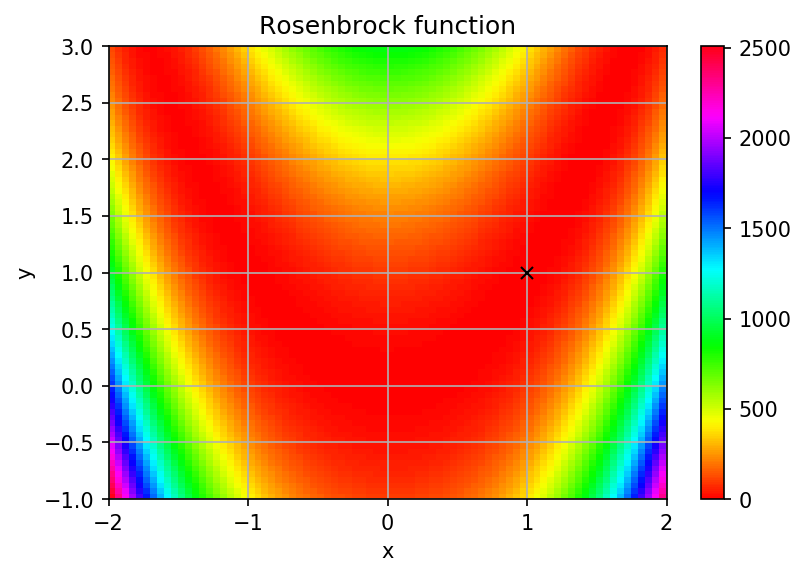

In [7]:
figsize = [6, 4]
dpi = 150
fig = figure(figsize=figsize, dpi=dpi)

pcolormesh(x, y, z, cmap=plt.get_cmap("hsv"))
plot(1, 1, 'xk')
# plot(1, 1, 'o')

grid(True)
xlabel('x')
ylabel('y')
title('Rosenbrock function')
colorbar()
show()

In [8]:
rosen([0, 1])

101.0

In [9]:
rosen([1, 1])

0.0

Add an adapter that prints out the optimization vector for each iteration

In [10]:
def rosen_print(v):
    print(v)
    return rosen(v)

Set the initial search location on the other side of the maxima so that algorithms have to work their way around the cost surface

In [11]:
x_0 = [-0.5, 2.75]

## Unconstrained, derivative free methods
Optimize with the most basic unconstrained search algorithm __Nelder-Mead__

In [12]:
minimize_result = minimize(rosen, x_0, method='nelder-mead', options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 106
         Function evaluations: 198
minimum found at [1.00000672 1.00001112]


Optimize with the derivative free unconstrained search algorithm __Powell__

In [13]:
minimize_result = minimize(rosen, x_0, method='powell', options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 389
minimum found at [1. 1.]


## Uconstrained, derivative based algorithms
Derivative based algorithms that can numerically approximate the derivative (Jacobian) of the cost function

Optimize with the derivative free unconstrained search algorithm **BFGS**.

In [14]:
minimize_result = minimize(rosen, x_0, method='BFGS', options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 220
         Gradient evaluations: 55
minimum found at [0.99999552 0.99999103]


Optimize with the derivative free unconstrained search algorithm __conjugate gradient__

In [15]:
minimize_result = minimize(rosen, x_0, method='CG', options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 29
         Function evaluations: 280
         Gradient evaluations: 70
minimum found at [0.99999553 0.99999105]


#### Derivative based algorithms that require the derivative (Jacobian) of the cost function

The __Newton-CG__ algorithm ...

In [16]:
minimize_result = minimize(rosen, x_0, method='Newton-CG', jac=rosen_der, options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 176
         Function evaluations: 189
         Gradient evaluations: 976
         Hessian evaluations: 0
minimum found at [0.99999998 0.99999996]


#### Derivative based algorithms that require both the Jacobian and Hessian of the cost function

The __trust-ncg__ algorithm ...

In [17]:
minimize_result = minimize(rosen, 
                                 x_0, 
                                 method='trust-ncg', 
                                 jac=rosen_der, 
                                 hess=rosen_hess, 
                                 options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 44
         Hessian evaluations: 43
minimum found at [0.99998845 0.99997686]


The __trust-krylov__ algorithm requires both the Jacobian and either the Hessian or Hessian-vector product to be supplied.  Supplying the Hessian-vector product raises an exception ...

It also is very verbose when options={'disp': True}

In [18]:
minimize_result = minimize(rosen, 
                                 x_0, method='trust-krylov', 
                                 jac=rosen_der, 
                                 hess=rosen_hess)
#, options={'disp': True})
print("minimum found at", minimize_result.x)
print("minimize result status:", minimize_result.status)
print("minimize result messge:", minimize_result.message)
print("minimize result iterations:", minimize_result.nit)
print("minimize result cost function evaluations:", minimize_result.nfev)
print("minimize result Jacobian evaluations:", minimize_result.njev)
print("minimize result Hessian evaluations:", minimize_result.nhev)
print("minimize result cost function value:", minimize_result.fun)
print("minimize result Jacobian value:", minimize_result.jac)
print("minimize result Hessian value:", minimize_result.hess)

minimum found at [0.99996262 0.99992508]
minimize result status: 0
minimize result messge: Optimization terminated successfully.
minimize result iterations: 43
minimize result cost function evaluations: 44
minimize result Jacobian evaluations: 44
minimize result Hessian evaluations: 37
minimize result cost function value: 1.3997918366502195e-09
minimize result Jacobian value: [-1.48854779e-05 -2.99422071e-05]
minimize result Hessian value: [[ 801.94024688 -399.98504647]
 [-399.98504647  200.        ]]


The __trust-exact__ algorithm requires both the Jacobian and either the Hessian or Hessian-vector product to be supplied.

In [19]:
minimize_result = minimize(rosen, 
                                 x_0, 
                                 method='trust-exact', 
                                 jac=rosen_der, 
                                 hess=rosen_hess,
                                 options={'disp': True})
print("minimum found at", minimize_result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 25
         Hessian evaluations: 29
minimum found at [0.99999982 0.99999964]


The __dogleg__ algorithm requires both the Jacobian and either the Hessian or Hessian-vector product to be supplied.

In [20]:
minimize_result = minimize(rosen, 
                                 x_0, 
                                 method='dogleg', 
                                 jac=rosen_der, 
                                 hess=rosen_hess, 
                                 options={'disp': True})
print("minimum found at", minimize_result.x)

         Current function value: 627.250000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1
minimum found at [-0.5   2.75]


Clearly it did not coverge

## Bounded, derivative free algorithms

In [21]:
bounds = Bounds([-1.0, 0.0], [2.0, 2.0], keep_feasible=False)
minimize_result = minimize(rosen_print, x_0, method='L-BFGS-B', options={'disp': True})#, bounds=bounds)
print("minimum found at", minimize_result.x)
print('options["disp"]=True for this algorithm does not print anything, printing the result attributes')
print("minimize result success:", minimize_result.success)
print("minimize result status:", minimize_result.status)
print("minimize result messge:", minimize_result.message)
print("minimize result iterations:", minimize_result.nit)
print("minimize result cost function evaluations:", minimize_result.nfev)
print("minimize result cost function value:", minimize_result.fun)
print("minimize result Jacobian value:", minimize_result.jac)

[-0.5   2.75]
[-0.49999999  2.75      ]
[-0.5         2.75000001]
[-1.20497588  2.04076872]
[-1.20497587  2.04076872]
[-1.20497588  2.04076873]
[-2.04853792  1.78723627]
[-2.04853791  1.78723627]
[-2.04853792  1.78723628]
[-1.37637438  1.98925493]
[-1.37637437  1.98925493]
[-1.37637438  1.98925494]
[-1.41163239  1.97978289]
[-1.41163238  1.97978289]
[-1.41163239  1.9797829 ]
[-1.40422756  1.98027434]
[-1.40422755  1.98027434]
[-1.40422756  1.98027435]
[-1.40377792  1.97894982]
[-1.40377791  1.97894982]
[-1.40377792  1.97894983]
[-1.40197936  1.97365172]
[-1.40197935  1.97365172]
[-1.40197936  1.97365173]
[-1.39478514  1.95245934]
[-1.39478513  1.95245934]
[-1.39478514  1.95245935]
[-1.36600827  1.86768979]
[-1.36600826  1.86768979]
[-1.36600827  1.8676898 ]
[-1.25090076  1.5286116 ]
[-1.25090075  1.5286116 ]
[-1.25090076  1.52861161]
[-1.06435259  1.03527319]
[-1.06435258  1.03527319]
[-1.06435259  1.0352732 ]
[-1.15414235  1.2727279 ]
[-1.15414234  1.2727279 ]
[-1.15414235  1.27272791

In [22]:
minimize_result = minimize(rosen, x_0, method='TNC', options={'disp': True})
print("minimum found at", minimize_result.x)
print('options["disp"]=True for this algorithm does not print anything, printing the result attributes')
print("minimize result status:", minimize_result.status)
print("minimize result messge:", minimize_result.message)
print("minimize result iterations:", minimize_result.nit)
print("minimize result cost function evaluations:", minimize_result.nfev)
print("minimize result cost function value:", minimize_result.fun)
print("minimize result Jacobian value:", minimize_result.jac)

minimum found at [0.9999387  0.99987728]
options["disp"]=True for this algorithm does not print anything, printing the result attributes
minimize result status: 1
minimize result messge: Converged (|f_n-f_(n-1)| ~= 0)
minimize result iterations: 21
minimize result cost function evaluations: 88
minimize result cost function value: 3.759209373977043e-09
minimize result Jacobian value: [-6.81580953e-05 -2.42171693e-05]


In [23]:
minimize_result = minimize(rosen, x_0, method='COBYLA', options={'disp': True})
print("minimum found at", minimize_result.x)
print('options["disp"]=True for this algorithm does not print anything, printing the result attributes')
print("minimize result status:", minimize_result.status)
print("minimize result messge:", minimize_result.message)
print("minimize result cost function evaluations:", minimize_result.nfev)
print("minimize result cost function value:", minimize_result.fun)
print("minimize result maximum constrain violation:", minimize_result.maxcv)


minimum found at [0.80973303 0.65483747]
options["disp"]=True for this algorithm does not print anything, printing the result attributes
minimize result status: 2
minimize result messge: Maximum number of function evaluations has been exceeded.
minimize result cost function evaluations: 1000
minimize result cost function value: 0.036270428518787264
minimize result maximum constrain violation: 0.0


Contrained optimization algorithms.  The primary question is: given the the global minimium is within the contraint region but the minimum path leads out of the constaint region, does the optimization algorithm still find the global minimum?